In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


In [245]:
df = pd.read_csv('train.csv')

In [246]:
df.head()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
0,62,Female,Asymptomatic,138,294,1,1,106,0,1.9,1,3,2,0,4
1,56,Female,Asymptomatic,200,288,1,0,133,1,4.0,0,2,3,0,688
2,57,Male,Non-anginal Pain,128,229,0,0,150,0,0.4,1,1,3,0,477
3,57,Male,Non-anginal Pain,150,126,1,1,173,0,0.2,2,1,3,1,336
4,52,Female,Non-anginal Pain,136,196,0,0,169,0,0.1,1,0,2,1,960


In [247]:
df.tail()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
815,57,Male,Asymptomatic,130,131,0,1,115,1,1.2,1,1,3,0,882
816,48,Male,Atypical Angina,110,229,0,1,168,0,1.0,0,0,3,0,367
817,62,Female,Asymptomatic,160,164,0,0,145,0,6.2,0,3,3,0,393
818,53,Male,Asymptomatic,123,282,0,1,95,1,2.0,1,2,3,0,777
819,61,Male,Non-anginal Pain,150,243,1,1,137,1,1.0,1,0,2,1,489


In [248]:
df.shape

(820, 15)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   820 non-null    int64  
 1   Gender                820 non-null    object 
 2   chest_pain_type       820 non-null    object 
 3   blood_pressure_level  820 non-null    int64  
 4   cholesterol_level     820 non-null    int64  
 5   blood_sugar           820 non-null    int64  
 6   restecg               820 non-null    int64  
 7   thalach               820 non-null    int64  
 8   exang                 820 non-null    int64  
 9   oldpeak               820 non-null    float64
 10  slope                 820 non-null    int64  
 11  ca                    820 non-null    int64  
 12  thal                  820 non-null    int64  
 13  Heart_Disease         820 non-null    int64  
 14  ID                    820 non-null    int64  
dtypes: float64(1), int64(12

In [250]:
df.describe()

,age,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.614634,132.348780,247.934146,0.153659,0.514634,149.378049,0.340244,1.077927,1.373171,0.745122,2.340244,0.513415,507.786585
std,9.105019,17.966807,51.456188,0.360841,0.523938,22.592931,0.474080,1.180970,0.624890,1.022178,0.605300,0.500125,296.924874
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,252.750000
50%,56.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,502.500000
75%,61.000000,140.000000,281.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,769.250000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1023.000000


Finding Missing Values in the dataset

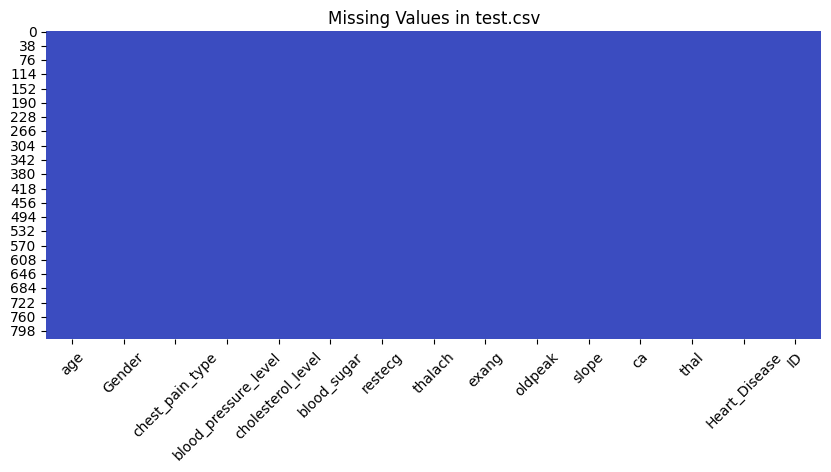

In [251]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values in test.csv')
plt.xticks(rotation=45)
plt.show()

By this graph we can say that the dataset is not having the null values

We are checking the duplicate in the dataset.

In [252]:
if 'ID' in df.columns:
    print("Duplicate IDs:", df['ID'].duplicated().sum())
else:
    print("Duplicate rows:", df.duplicated().sum())


Duplicate IDs: 0


Checking the numeric values in the dataset except id and index

In [253]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c.lower() not in ('id','index')]
print("Numeric columns:", num_cols)

Numeric columns: ['age', 'blood_pressure_level', 'cholesterol_level', 'blood_sugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Heart_Disease']


Plotting The Histogram and Boxplot Graph

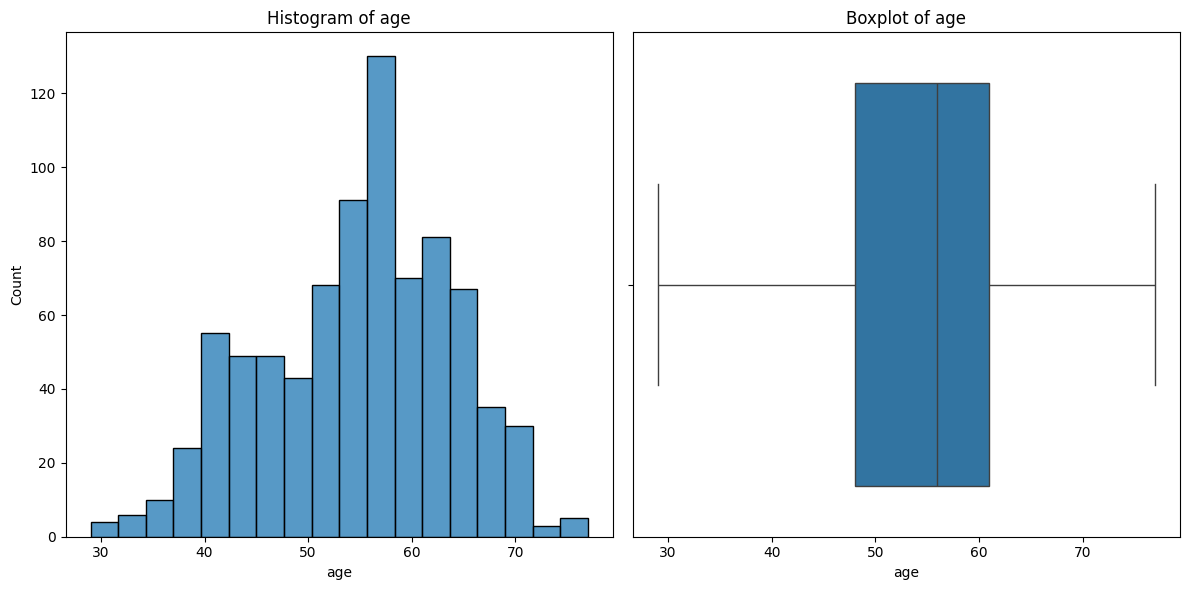

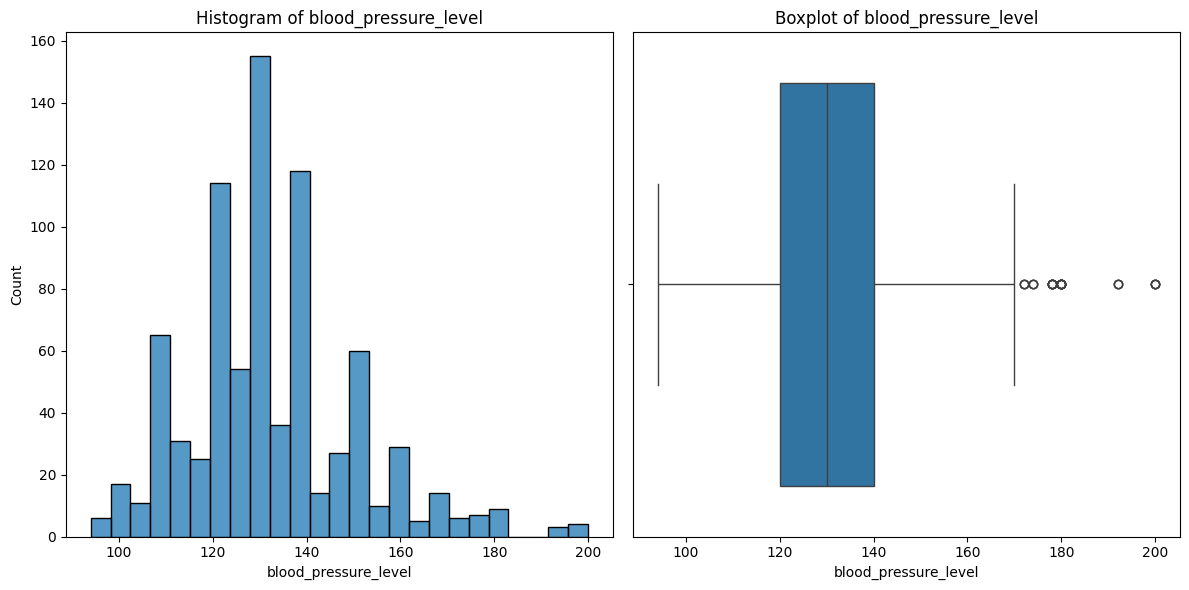

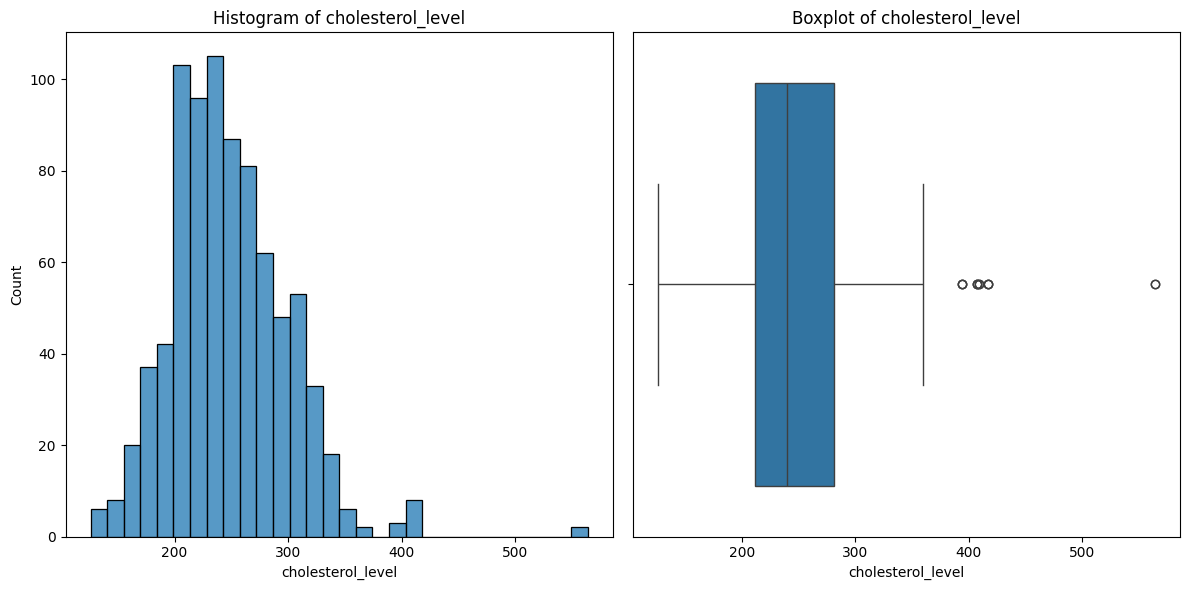

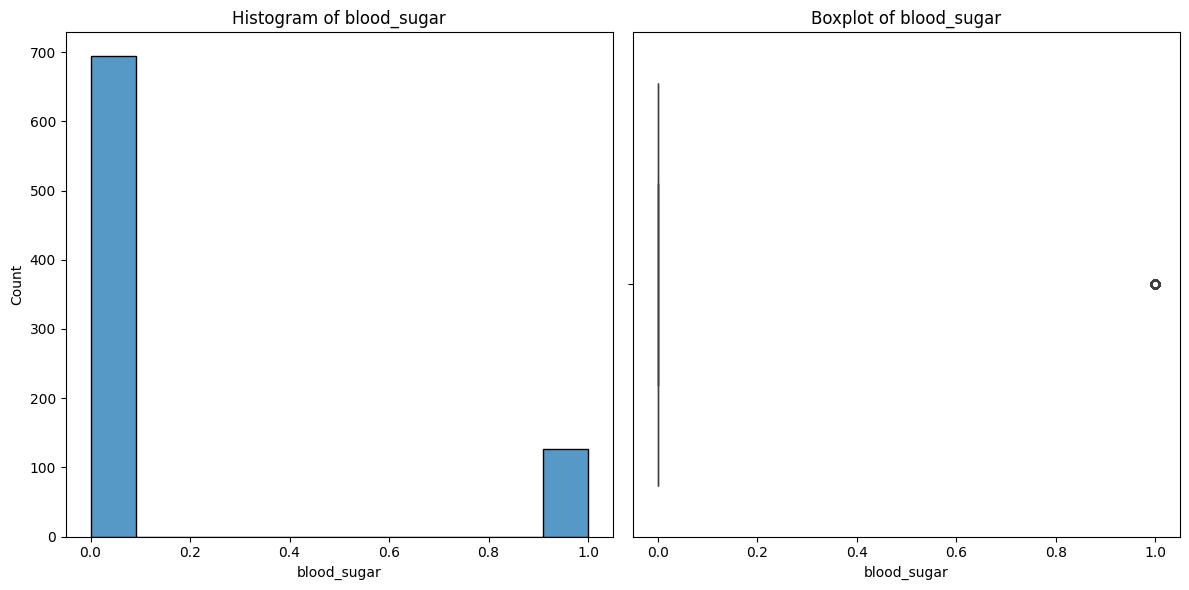

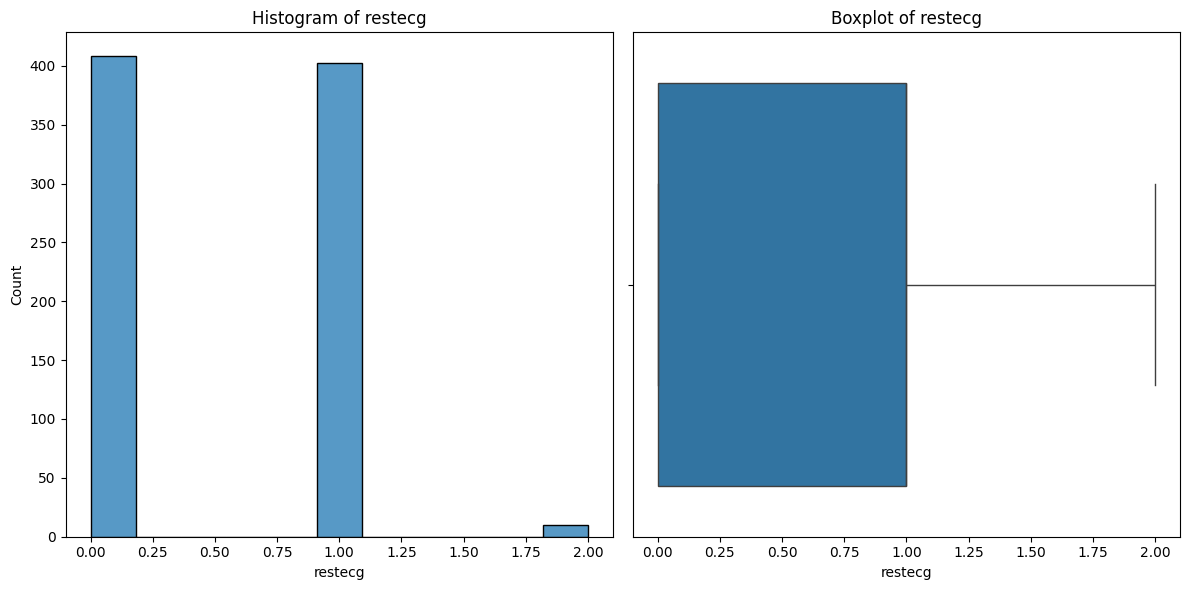

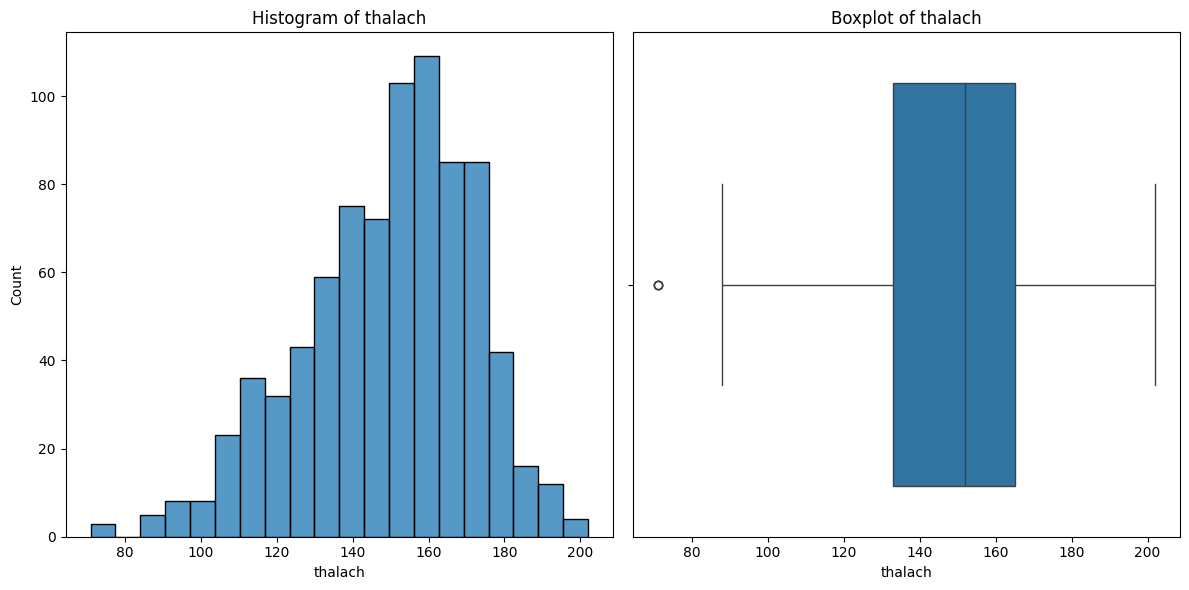

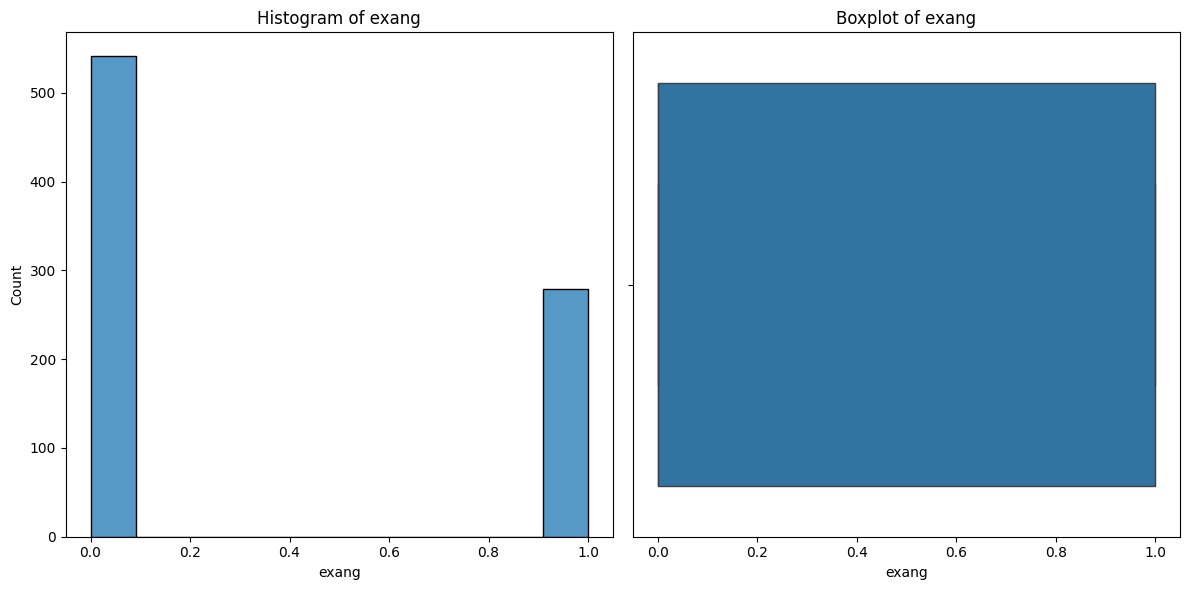

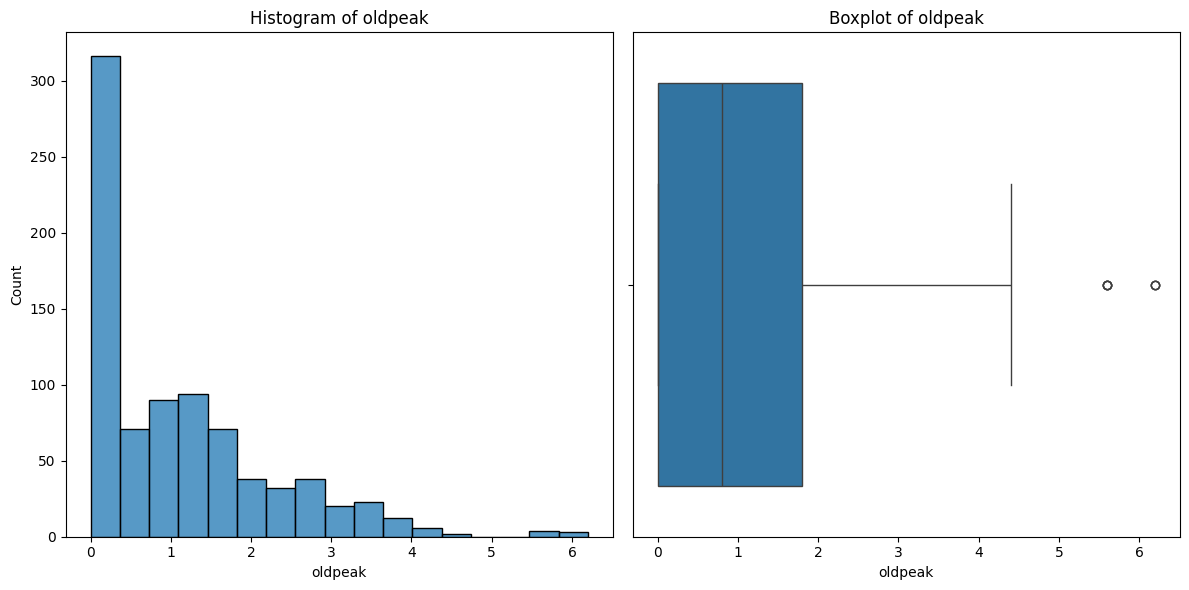

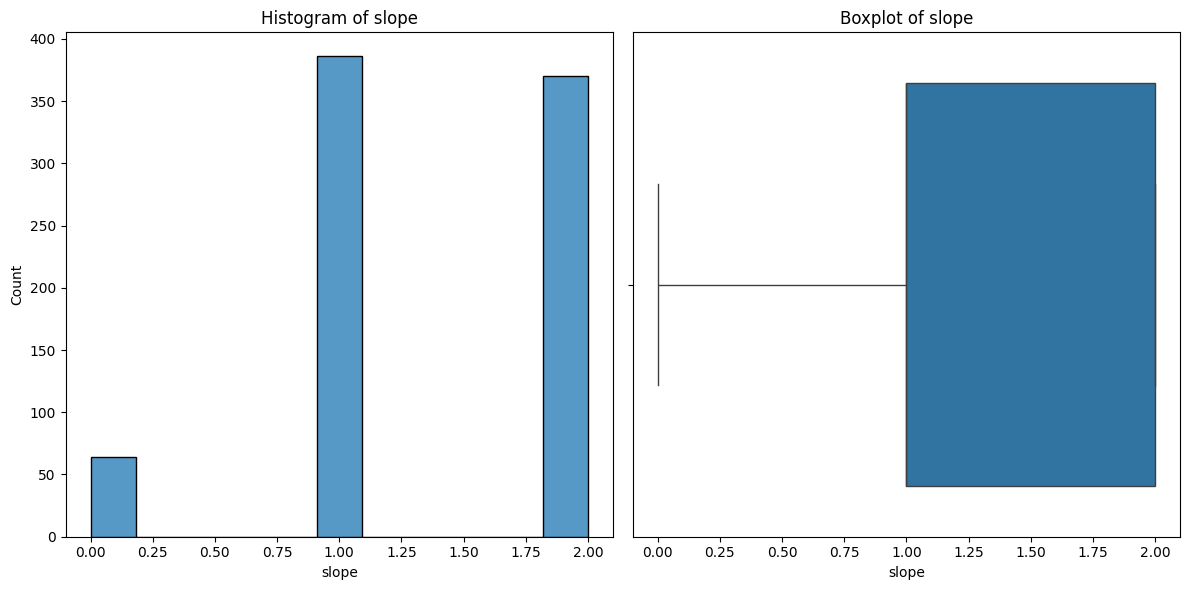

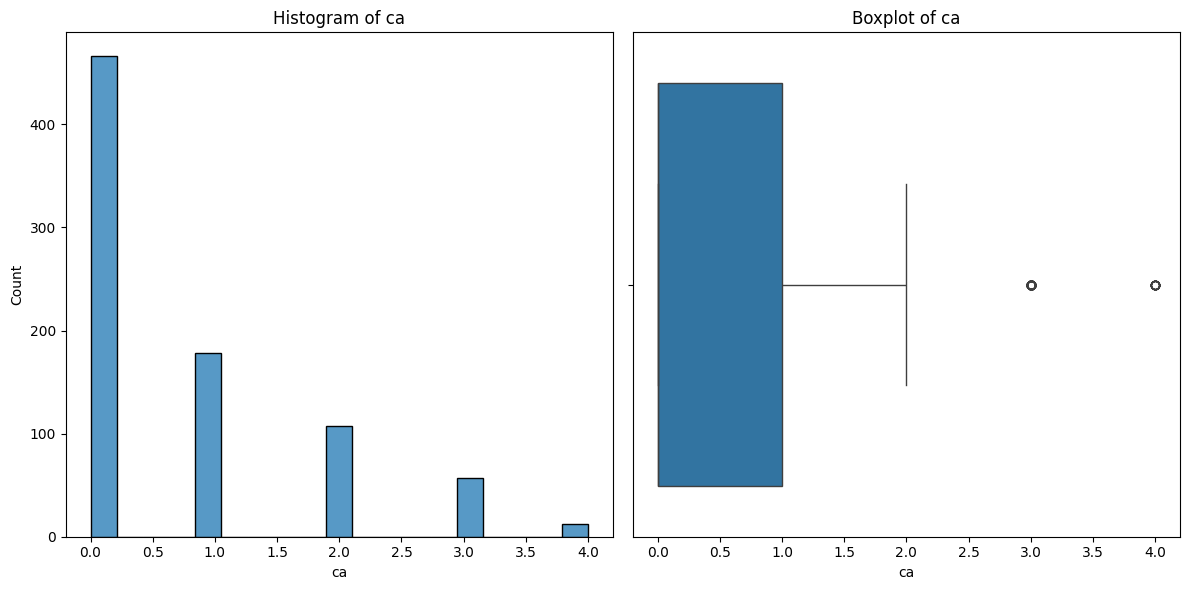

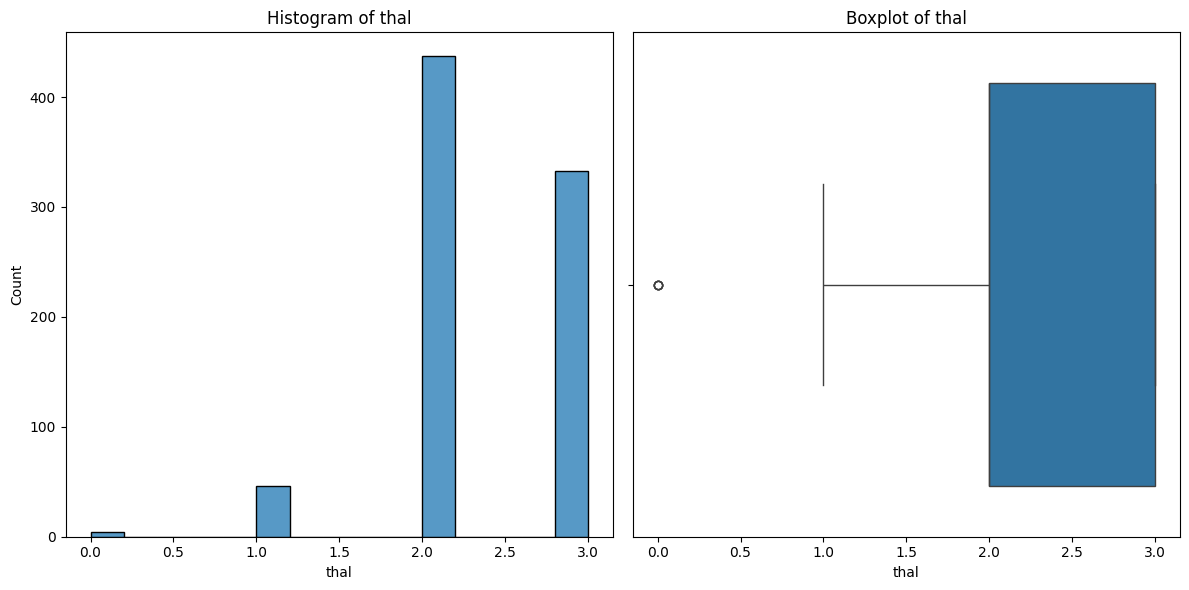

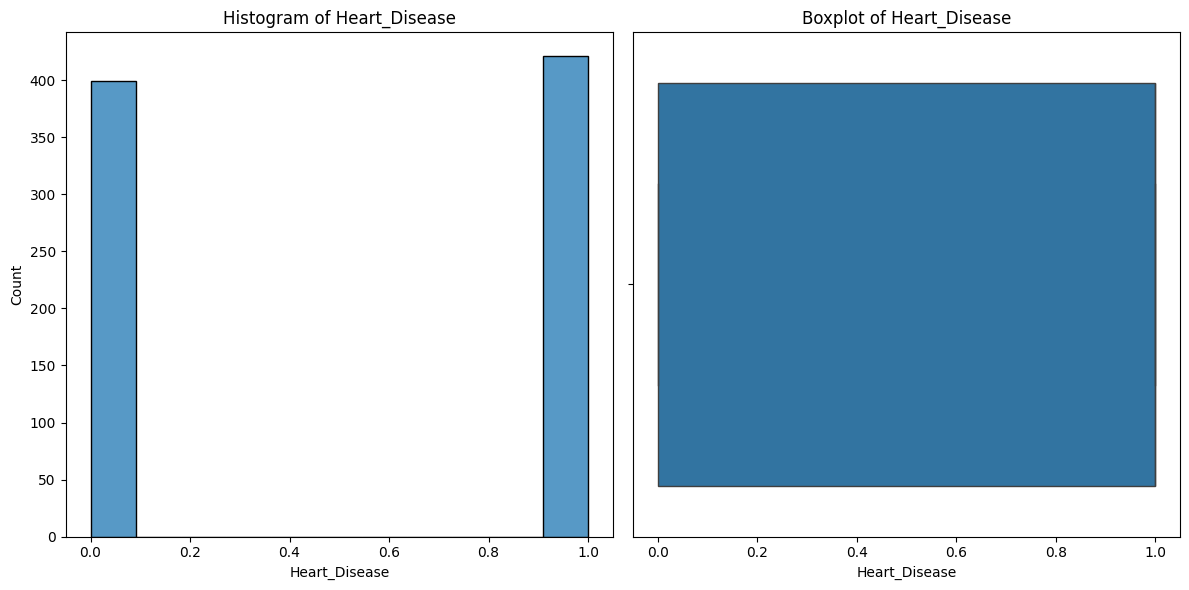

In [254]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

Correlation Heatmap

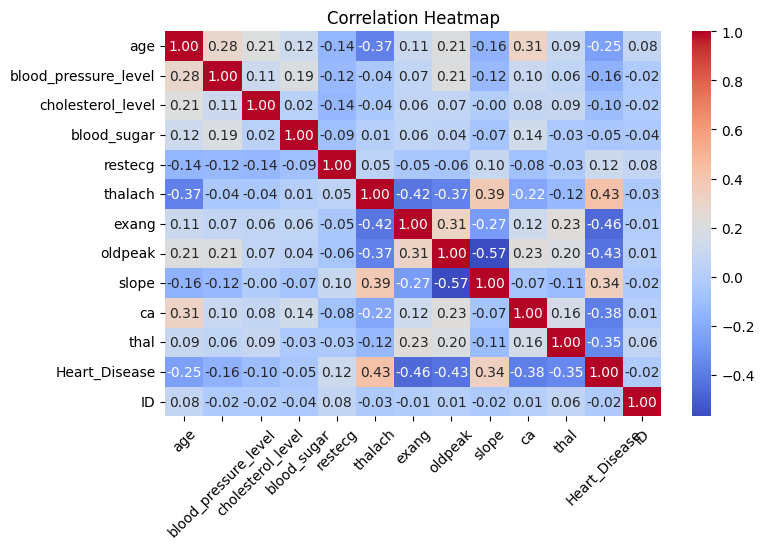

In [255]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

Doing Encoding Label Encoder on Gender, Chest Pain, restecg, exang, slope and thal

In [256]:
from sklearn.preprocessing import LabelEncoder

L = LabelEncoder()
columns_to_encode_ord = ['Gender', 'chest_pain_type', 'restecg', 'exang', 'slope', 'thal']
columns_to_encode_actual = [
    col for col in columns_to_encode_ord
    if col in df.columns and df[col].dtype == 'object'
]
for col in columns_to_encode_actual:
    df[col] = L.fit_transform(df[col])




In [257]:
df.head(10)

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4
1,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,688
2,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0,477
3,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,336
4,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1,960
5,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0,331
6,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0,720
7,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1,541
8,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1,75
9,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,436



Now we are applying one hot encoding label

In [258]:
columns_to_encode_ohe = ['Gender', 'chest_pain_type', 'blood_sugar', 'restecg', 'exang', 'slope', 'ca', 'thal']
existing_cols_to_ohe = [col for col in columns_to_encode_ohe if col in df.columns]
if existing_cols_to_ohe:
    df = pd.get_dummies(df, columns=existing_cols_to_ohe, drop_first=True, dtype=int)



In [259]:
df.head(10)

,age,blood_pressure_level,cholesterol_level,thalach,oldpeak,Heart_Disease,ID,Gender_1,chest_pain_type_1,chest_pain_type_2,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,62,138,294,106,1.9,0,4,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,56,200,288,133,4.0,0,688,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,57,128,229,150,0.4,0,477,1,0,1,...,0,1,0,1,0,0,0,0,0,1
3,57,150,126,173,0.2,1,336,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,52,136,196,169,0.1,1,960,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,63,108,269,169,1.8,0,331,0,0,0,...,1,1,0,0,1,0,0,0,1,0
6,64,140,335,158,0.0,0,720,1,0,1,...,0,0,1,0,0,0,0,0,1,0
7,44,140,235,180,0.0,1,541,1,0,1,...,0,0,1,0,0,0,0,0,1,0
8,47,138,257,156,0.0,1,75,1,0,1,...,0,0,1,0,0,0,0,0,1,0
9,59,174,249,143,0.0,0,436,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [260]:
df.columns.tolist()

['age',
 'blood_pressure_level',
 'cholesterol_level',
 'thalach',
 'oldpeak',
 'Heart_Disease',
 'ID',
 'Gender_1',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'blood_sugar_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_1',
 'thal_2',
 'thal_3']

Splitting The Dataset in Train and Test

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
X_train.shape


(656, 15)

In [263]:
X_test.shape

(164, 15)

In [264]:
y_train.shape

(656,)

In [265]:
y_test.shape

(164,)

Applying MinMax Scaler Normalization


In [266]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [267]:
df.head(10)

,age,blood_pressure_level,cholesterol_level,thalach,oldpeak,Heart_Disease,ID,Gender_1,chest_pain_type_1,chest_pain_type_2,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,62,138,294,106,1.9,0,4,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,56,200,288,133,4.0,0,688,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,57,128,229,150,0.4,0,477,1,0,1,...,0,1,0,1,0,0,0,0,0,1
3,57,150,126,173,0.2,1,336,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,52,136,196,169,0.1,1,960,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,63,108,269,169,1.8,0,331,0,0,0,...,1,1,0,0,1,0,0,0,1,0
6,64,140,335,158,0.0,0,720,1,0,1,...,0,0,1,0,0,0,0,0,1,0
7,44,140,235,180,0.0,1,541,1,0,1,...,0,0,1,0,0,0,0,0,1,0
8,47,138,257,156,0.0,1,75,1,0,1,...,0,0,1,0,0,0,0,0,1,0
9,59,174,249,143,0.0,0,436,0,0,0,...,1,1,0,0,0,0,0,0,1,0


Applying Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression

L = LogisticRegression()
L.fit(X_train, y_train)
y_pred_logistic = L.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [269]:
y_pred_prob_logistic = L.predict_proba(X_test)[:, 1]

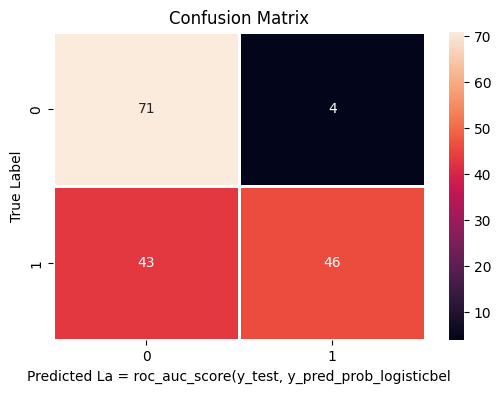

Accurcy Score of Logistic Regression: 0.71341
AUC of Logistic Regression: 0.96105
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        75
           1       0.92      0.52      0.66        89

    accuracy                           0.71       164
   macro avg       0.77      0.73      0.71       164
weighted avg       0.78      0.71      0.70       164



In [270]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_logistic = accuracy_score(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
cr_logistic = classification_report(y_test, y_pred_logistic)

plt.figure(figsize=(6,4))
sns.heatmap(cm_logistic, annot=True, fmt='d', linewidths=1)
plt.xlabel("Predicted La = roc_auc_score(y_test, y_pred_prob_logisticbel")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of Logistic Regression: {acc_logistic:.5f}")
print(f"AUC of Logistic Regression: {auc_logistic:.5f}")
print(cr_logistic)

ROC Curves and AUC Values

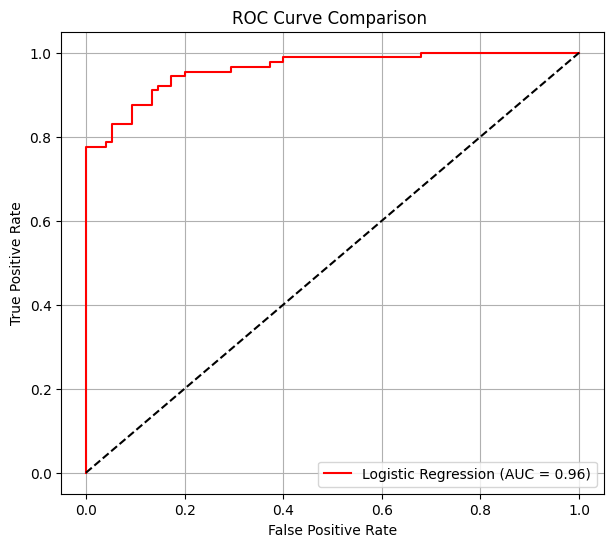

In [271]:
from sklearn.metrics import roc_curve, auc

log_prob = L.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)

auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='red')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

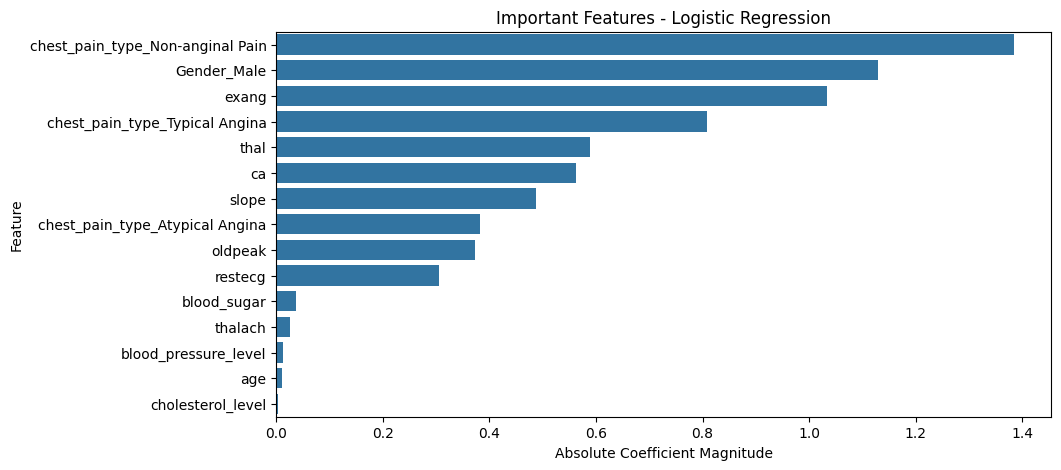

In [272]:
feature_names = X.columns
log_importance = np.abs(L.coef_[0])
log_feat_imp = pd.Series(log_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=log_feat_imp.values, y=log_feat_imp.index)
plt.title("Important Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

Random Forest Classifier

In [273]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
y_pred_random = RF.predict(X_test)

In [274]:
y_pred_prob_random = RF.predict_proba(X_test)[:,1]

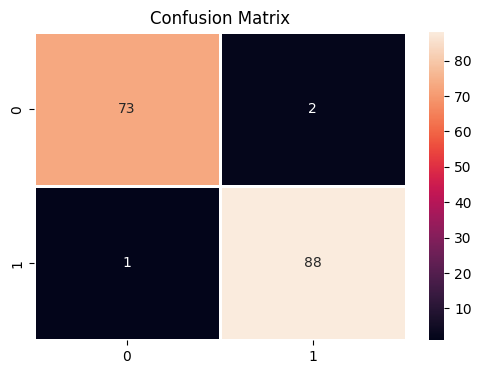

Accurcy Score of Random Forest Classifier: 0.98171
AUC of Random Forest Classifier: 0.99700
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.98      0.99      0.98        89

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



In [275]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_random = accuracy_score(y_test, y_pred_random)
cm_random = confusion_matrix(y_test, y_pred_random)
auc_random = roc_auc_score(y_test, y_pred_prob_random)
cr_random = classification_report(y_test, y_pred_random)

plt.figure(figsize=(6,4))
sns.heatmap(cm_random, annot=True, fmt='d', linewidths=1)
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of Random Forest Classifier: {acc_random:.5f}")
print(f"AUC of Random Forest Classifier: {auc_random:.5f}")
print(cr_random)

ROC Curve and AUC Values

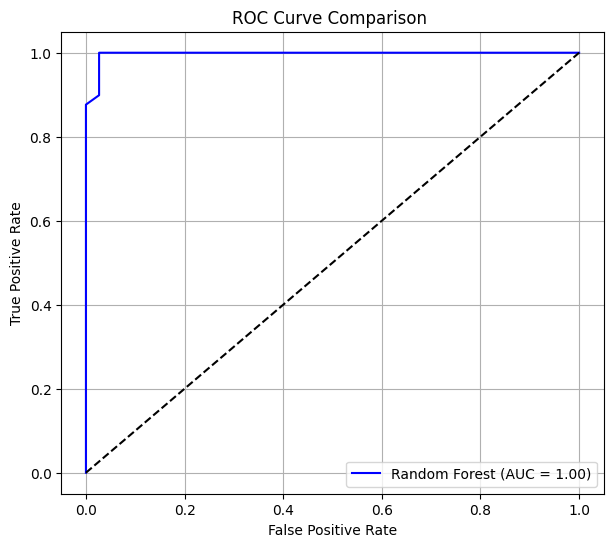

In [276]:
RF_prob = RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, RF_prob)

auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

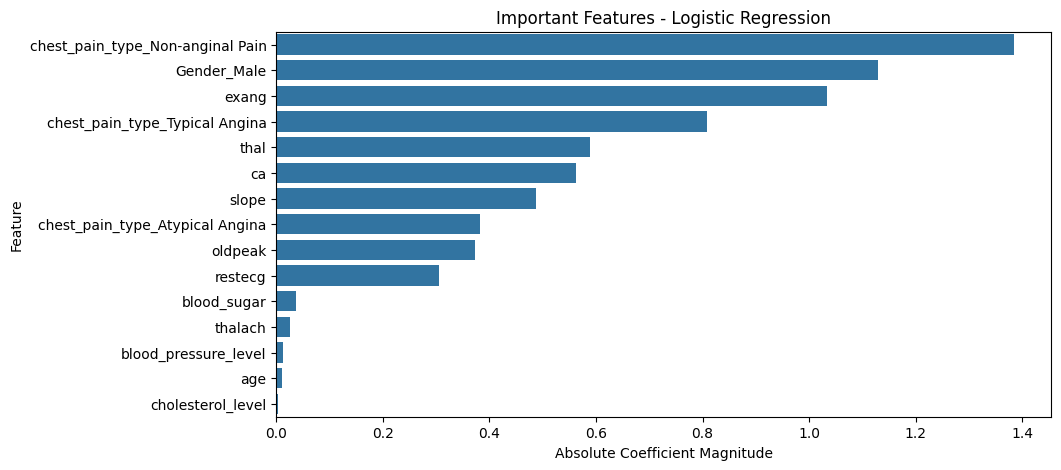

In [277]:
feature_names = X.columns
log_importance = np.abs(L.coef_[0])
log_feat_imp = pd.Series(log_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=log_feat_imp.values, y=log_feat_imp.index)
plt.title("Important Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

XG Boost


In [278]:
XG = XGBClassifier(n_estimators=100)
XG.fit(X_train, y_train)
y_pred_random = XG.predict(X_test)

In [279]:
y_pred_prob_random = XG.predict_proba(X_test)[:,1]

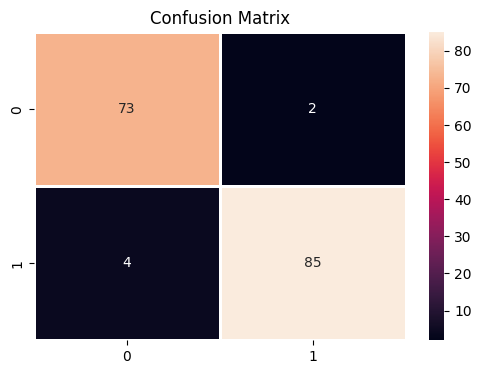

Accurcy Score of XGB Classifier: 0.96341
AUC of XGB Classifier: 0.98936
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.98      0.96      0.97        89

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



In [280]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

acc_random = accuracy_score(y_test, y_pred_random)
cm_random = confusion_matrix(y_test, y_pred_random)
auc_random = roc_auc_score(y_test, y_pred_prob_random)
cr_random = classification_report(y_test, y_pred_random)

plt.figure(figsize=(6,4))
sns.heatmap(cm_random, annot=True, fmt='d', linewidths=1)
plt.title("Confusion Matrix")
plt.show()

print(f"Accurcy Score of XGB Classifier: {acc_random:.5f}")
print(f"AUC of XGB Classifier: {auc_random:.5f}")
print(cr_random)

ROC Curve and AUC Values

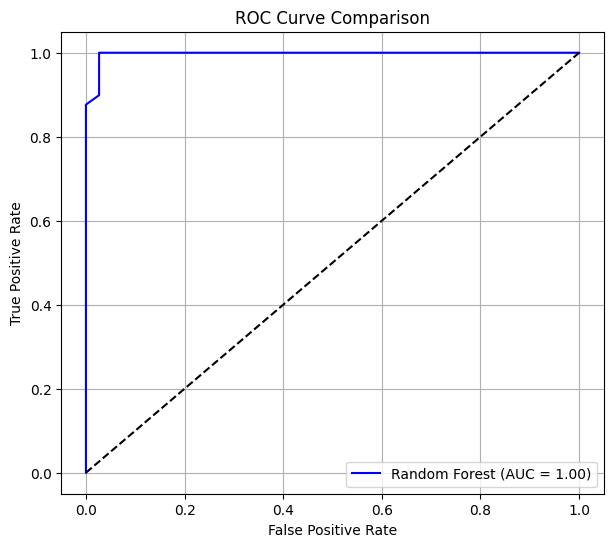

In [281]:
xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

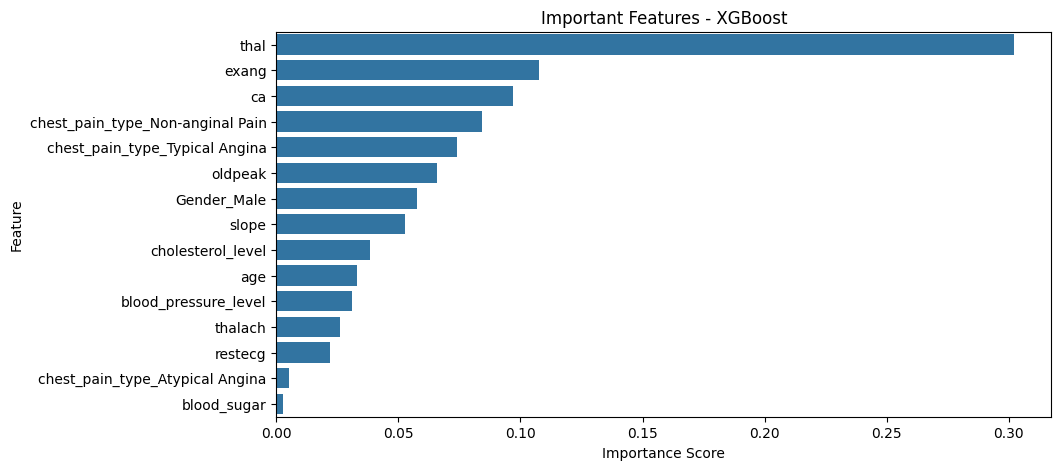

In [282]:
xgb_feat_imp = pd.Series(xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index)
plt.title("Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()